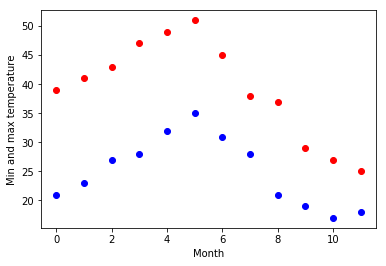

In [26]:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset given below.

import numpy as np
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]) ## The max temp data set
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]) ## The min temp data set

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.show()

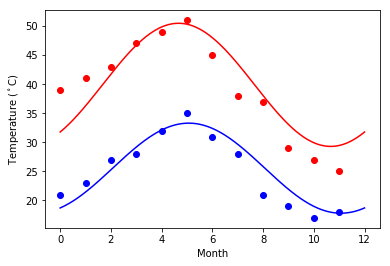

In [26]:
#### Fitting it to the periodic function

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [31]:
#### Loading and reading the Titanic Dataset

import pandas as pd
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [27]:
## Male and Female count filtered by those who survived versus those who died

table = pd.pivot_table(data=titanic, values='pclass', index='sex', columns='survived', aggfunc='count')
print(table)

survived  0.0  1.0
sex               
female    127  339
male      682  161


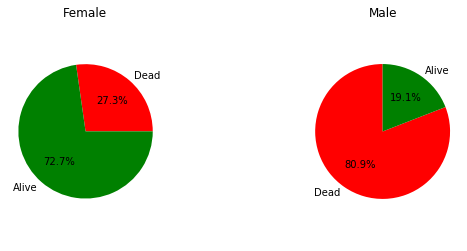

In [16]:
## Create a pie chart presenting the male/female proportion

import pandas as pd
import matplotlib.pyplot as plt
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
table = pd.pivot_table(data=titanic, values='pclass', index='sex', columns='survived', aggfunc='count')
pie_female = table.loc['female']
pie_male = table.loc['male']
# Create the figure with one row and two columns. Figsize will define the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
# Create the pie chart on the first position with the given configurations
pie_1 = axes[0].pie(pie_female, labels=['Dead','Alive'],
                    autopct='%1.1f%%', colors=['red', 'green'])
# Define this plot title
axes[0].set_title('Female')
# Make both axes equal, so that the chart is round
axes[0].axis('equal')
# Same as above, for the second pie chart
pie_2 = axes[1].pie(pie_male, labels=['Dead','Alive'], 
                    autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[1].set_title('Male')
plt.axis('equal')
# Adjust the space between the two charts
plt.subplots_adjust(wspace=1)
plt.show()

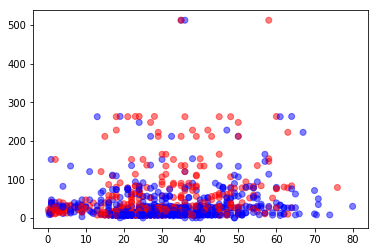

In [25]:
### Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))